Import all needed modules and read the data into a panda dataframe

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
import common as t


In [202]:
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Initial look at the data

In [ ]:
df.shape

In [ ]:
#show all the columns 
cols = df.columns.to_list()
print(cols)

In [ ]:
col_types = df.dtypes.to_dict()
print(col_types)

Check if there is any null or duplicate values

In [ ]:
df.columns[df.isnull().mean() == 0]

In [ ]:
df.columns[df.isnull().mean() > 0.5]

In [ ]:
df.columns[df.isnull().mean() > 0.75]

I want to answer the following questions:
What characteristics do ‘tech professionals’ have in common? 
Do those characteristics influence job satisfaction and salary?

First, select columns that matter to answer above questions

In [203]:
selected_columns = [
#basic info
'Respondent', 'Professional', 'ProgramHobby', 'Country', 'University', 
'EmploymentStatus', 'FormalEducation', 'MajorUndergrad', 
#personality info
'ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 
'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 
'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld', 'Overpaid',
#measurment variables
'JobSeekingStatus', 'HoursPerWeek', 
'Salary', 'CareerSatisfaction', 'JobSatisfaction'
]

In [204]:
df = df[selected_columns]

In [ ]:
df.columns[df.isnull().mean() > 0.5]

Let's explore how many percentage of respondent chose what answer

In [205]:
def clean_and_plot(df, col, plot=False):
    '''
    INPUT 
        df - a dataframe 
        col - the column to group data by
        plot - bool providing whether or not you want a plot back
        
    OUTPUT
        perc_df - a dataframe with the percentage of individuals agree or disagree to the statement
        Displays a plot of pretty things related to the input column.
    '''
    group_df = df.groupby(col)['Respondent'].count().sort_values(ascending=False)
    if plot:
        (group_df/group_df.sum()*100).plot(kind='bar', legend=None);
        plt.title(f'Percentage of Answer to {col}');
        plt.show()
    per_df =  group_df/group_df.sum()*100
    per_df.name = col
    # per_df = per_df.rename(columns={'Respondent': col})
    return per_df

In [206]:
personality_indicators = ['BuildingThings', 'LearningNewTech', 'BoringDetails', 
'JobSecurity', 'DiversityImportant', 'AnnoyingUI', 'FriendsDevelopers', 'RightWrongWay', 
'UnderstandComputers', 'SeriousWork', 'InvestTimeTools', 'WorkPayCare', 'KinshipDevelopers', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

result_df = clean_and_plot(df, 'ProblemSolving')
for i in personality_indicators:
    # print(clean_and_plot(df, i))
    result_df = pd.concat([clean_and_plot(df, i), result_df], axis=1)

result_df


,ChangeWorld,CompetePeers,ChallengeMyself,DifficultCommunication,InTheZone,EnjoyDebugging,KinshipDevelopers,WorkPayCare,InvestTimeTools,SeriousWork,UnderstandComputers,RightWrongWay,FriendsDevelopers,AnnoyingUI,DiversityImportant,JobSecurity,BoringDetails,LearningNewTech,BuildingThings,ProblemSolving
Agree,29.713916,21.230120,47.115043,8.579622,42.432709,33.052243,42.863657,7.376070,40.723953,48.078287,22.920089,22.827911,23.827157,37.387576,38.866777,41.725352,16.463571,39.777664,36.559518,35.420062
Somewhat agree,29.287215,28.691983,12.479416,21.558704,22.551959,33.982866,33.577617,20.145325,32.247620,15.992777,25.996070,31.932610,25.507937,16.482383,23.826166,25.166453,31.631606,9.717608,6.576167,6.039689
Strongly agree,23.390981,7.474846,38.300345,2.132254,29.311755,10.965900,12.074132,2.638463,15.816227,32.849681,13.869295,12.974438,9.173455,40.201799,25.958645,23.517926,5.047460,48.933044,55.814177,57.648675
Disagree,14.372070,31.817592,1.701592,49.881916,4.841567,17.920376,9.699694,44.911997,10.415722,2.592378,25.883338,24.841854,30.939885,4.841881,7.530013,7.708067,38.064392,1.181958,0.794007,0.572013
Strongly disagree,3.235817,10.785459,0.403603,17.847503,0.862010,4.078616,1.784900,24.928145,0.796477,0.486877,11.331208,7.423186,10.551566,1.086361,3.818400,1.882202,8.792971,0.389727,0.256131,0.319560


In [207]:
Agree = result_df.loc['Agree']
Somewhat_agree = result_df.loc['Somewhat agree']
Strongly_agree = result_df.loc['Strongly agree']
Disagree = result_df.loc['Disagree']
Strongly_disagree = result_df.loc['Strongly disagree']

plot_df = pd.concat([Strongly_agree, Somewhat_agree, Agree, Disagree, Strongly_disagree], axis=1)
plot_df

,Strongly agree,Somewhat agree,Agree,Disagree,Strongly disagree
ChangeWorld,23.390981,29.287215,29.713916,14.372070,3.235817
CompetePeers,7.474846,28.691983,21.230120,31.817592,10.785459
ChallengeMyself,38.300345,12.479416,47.115043,1.701592,0.403603
DifficultCommunication,2.132254,21.558704,8.579622,49.881916,17.847503
InTheZone,29.311755,22.551959,42.432709,4.841567,0.862010
EnjoyDebugging,10.965900,33.982866,33.052243,17.920376,4.078616
KinshipDevelopers,12.074132,33.577617,42.863657,9.699694,1.784900
WorkPayCare,2.638463,20.145325,7.376070,44.911997,24.928145
InvestTimeTools,15.816227,32.247620,40.723953,10.415722,0.796477
SeriousWork,32.849681,15.992777,48.078287,2.592378,0.486877


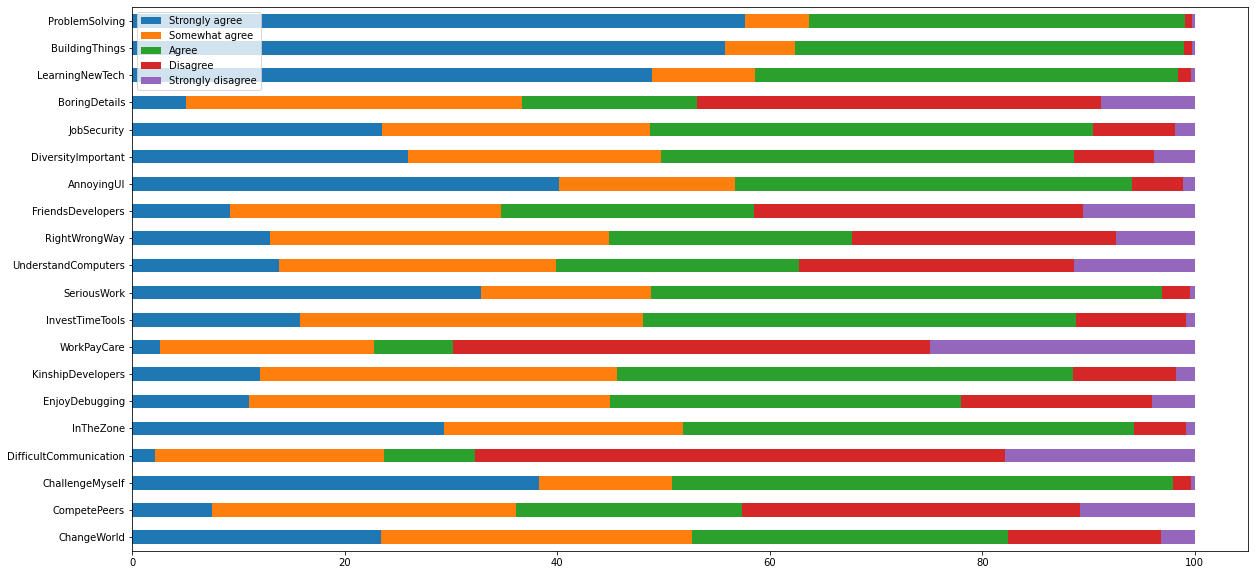

In [226]:
ax = plot_df.plot.barh(stacked=True, figsize=(20,10))
plt.savefig('plot0.png')


Cool, most people agree to BuildingThings, ProblemSolving. Now let's look at the corr. 
In order to do that, Let's translate the level of agreeness to the statement into numeric values


In [211]:
replace_values = {
 'Strongly agree': 5,
 'Somewhat agree': 4, 
 'Agree': 3 ,
 'Disagree': 2,
 'Strongly disagree': 1}

In [212]:
s_df = df.replace(replace_values)
s_df = s_df.set_index('Respondent')

In [213]:
plot_df1 = s_df.dropna(subset=['Salary', 'CareerSatisfaction', 'JobSatisfaction'])


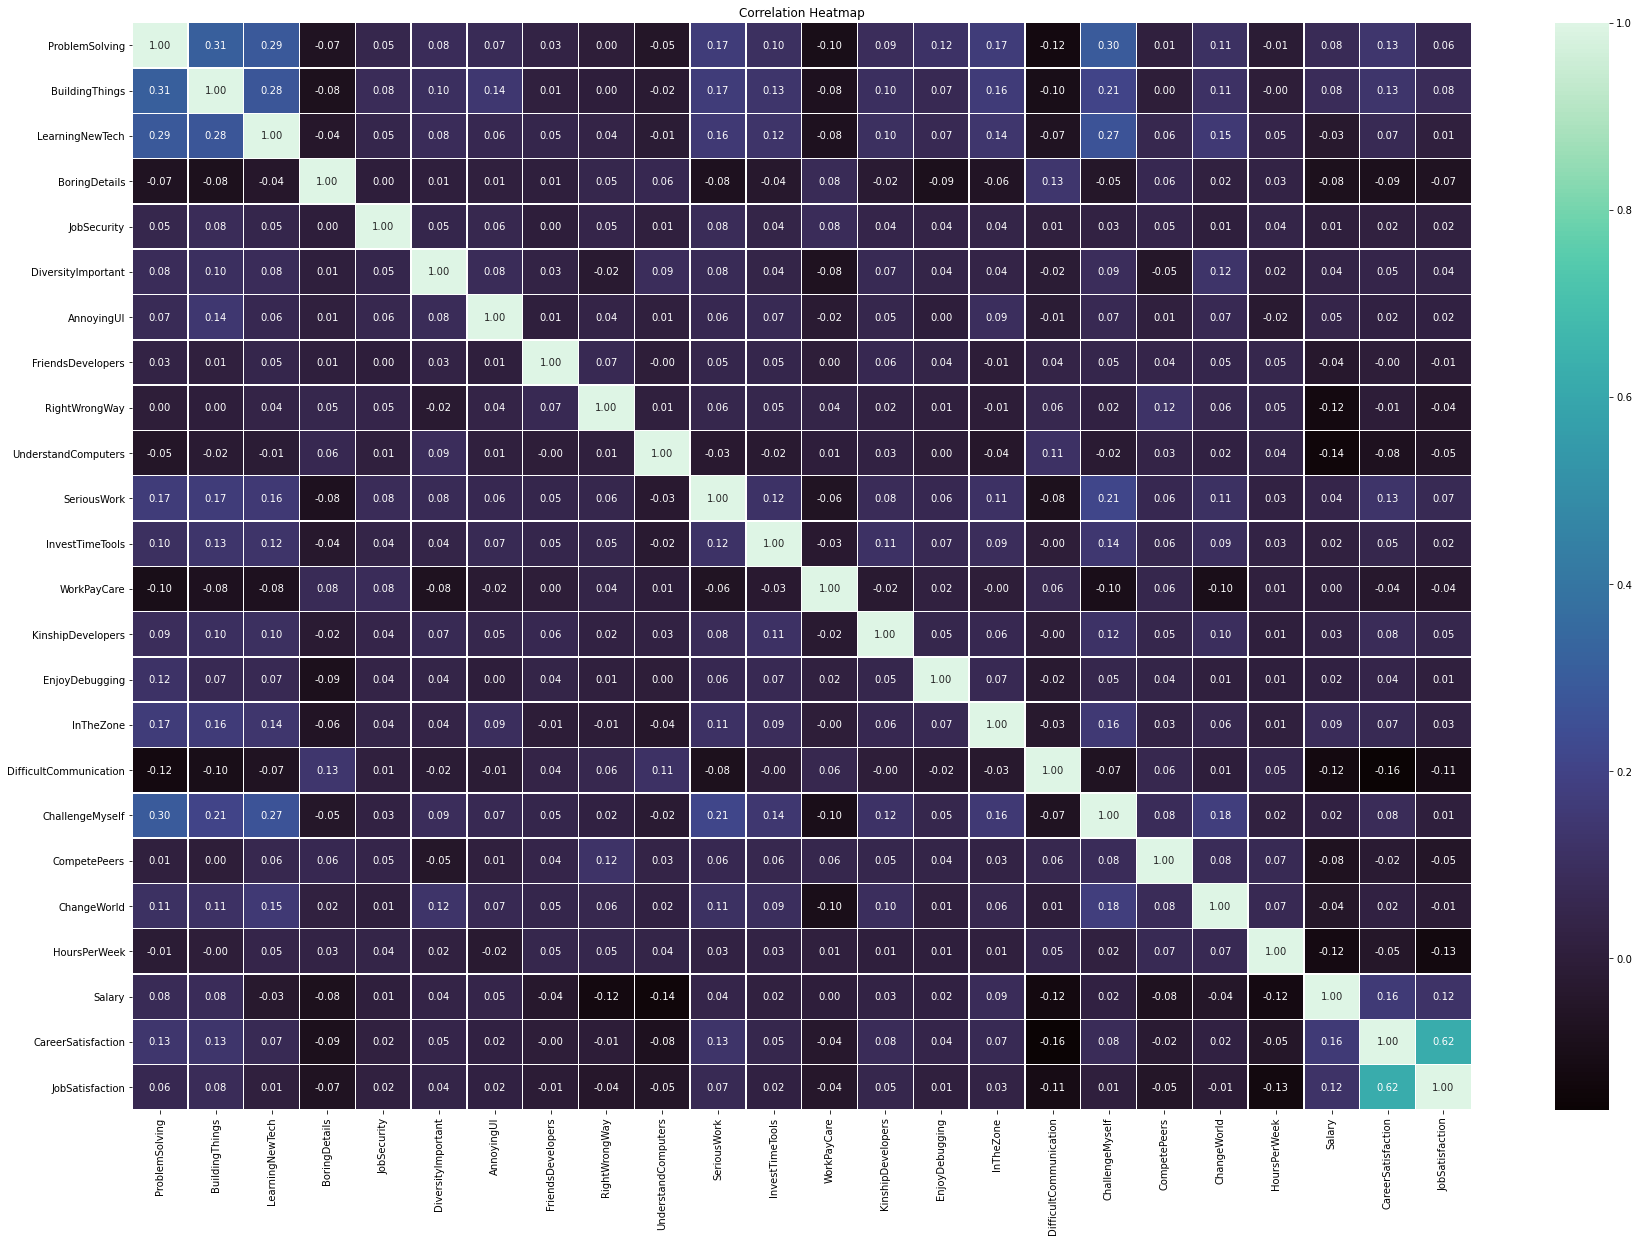

In [225]:
# Calculate the correlation matrix
corr_matrix = plot_df1.corr()
# matrix = np.triu(corr_matrix)


# Set the figure size
plt.figure(figsize=(30, 20))

# Create the heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='mako', fmt='.2f', linewidths=0.5)

# Add title
plt.title('Correlation Heatmap')


plt.savefig('plot.png')
# Show the plot
plt.show()


So problemSolving, BuildingThings, LearningNewTech often come together

Now, let's look at mean salary by ProblemSolving, BuildingThings, LearningNewTech

In [229]:
def mean_col2_by_col1(df, col1, col2='Salary', plot=True):
    df = df.dropna(subset=[col2])
    result_df = df.groupby(col1)[col2].mean().sort_values(ascending=False)
    if plot:
        # Create a bar plot
        plt.figure(figsize=(8, 6))
        plt.bar(result_df.index, result_df.values, color='skyblue')
        plt.xlabel(f"{col1}")
        plt.ylabel(f"Mean {col2}")
        plt.title(f"Mean {col2} by {col1}")
        plt.xticks(rotation=45)

        # Show the plot
        plt.tight_layout()
        plt.savefig(f'img/{col2}_by_{col1}.png')
        plt.show()
    return result_df

Pretty suprised that those disagree to ProblemSolving and LeaninngNewTech has higher salary 

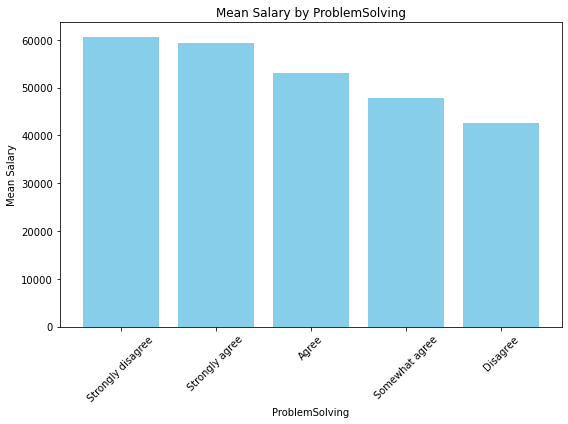

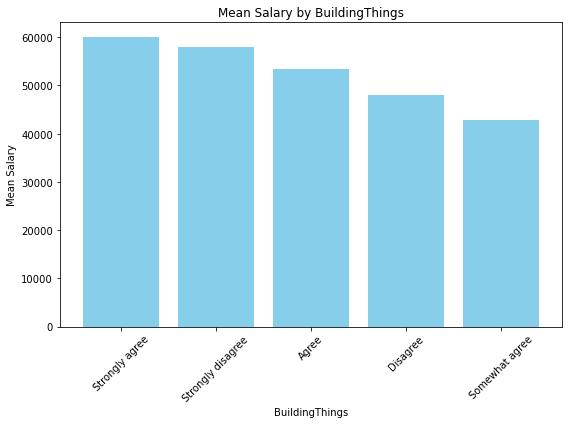

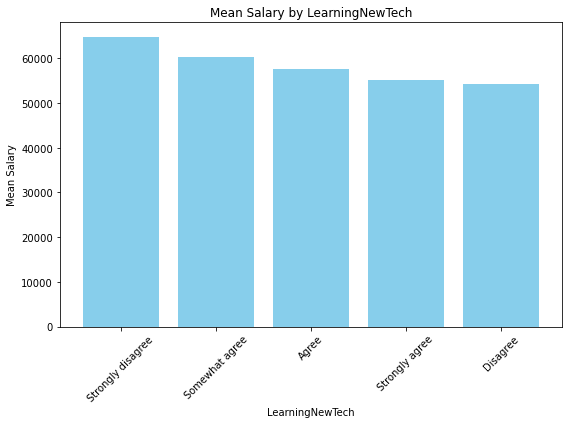

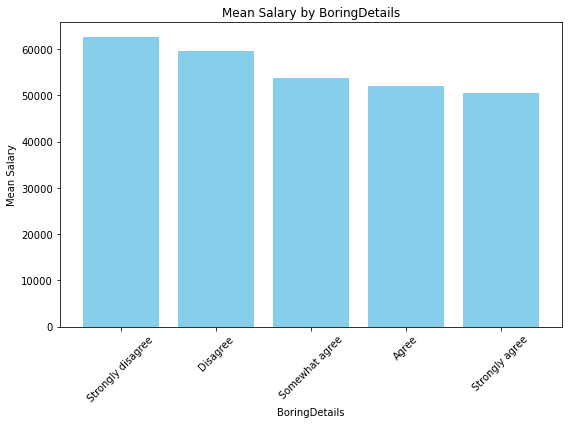

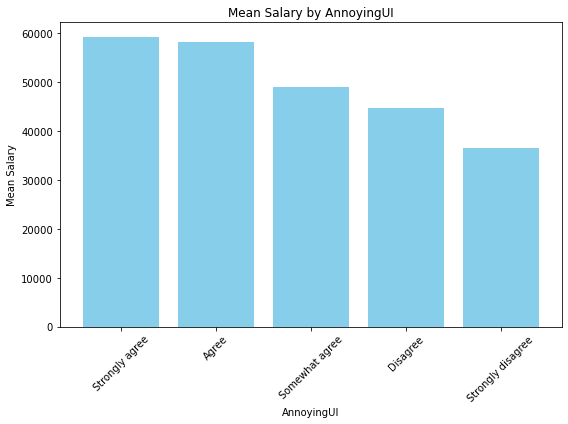

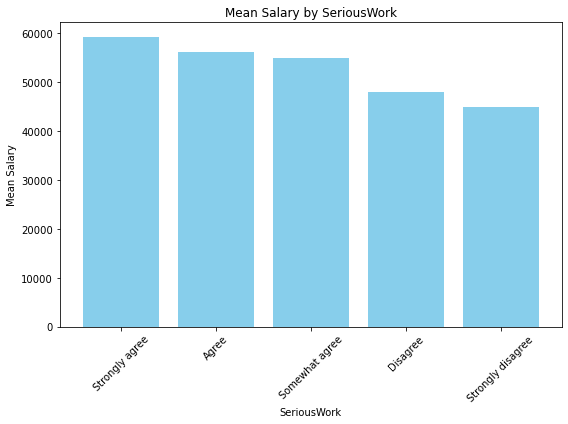

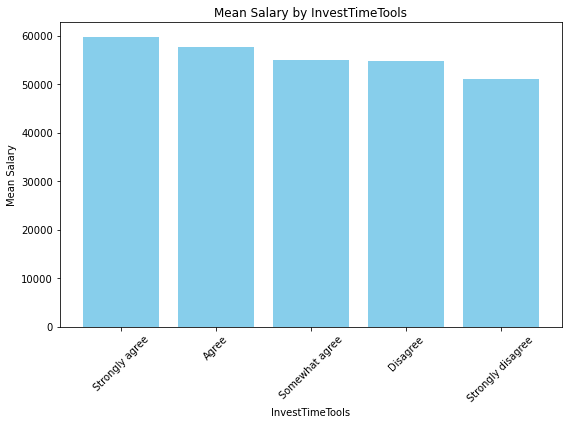

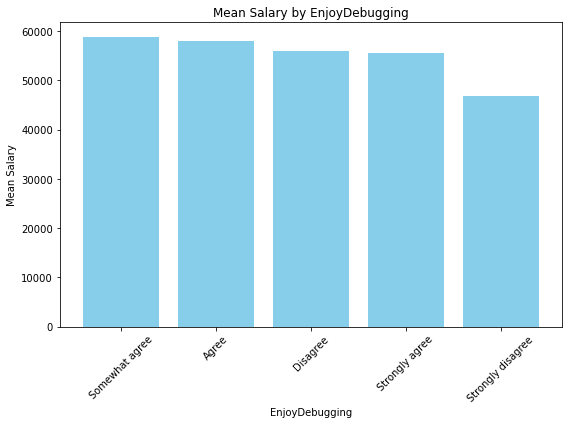

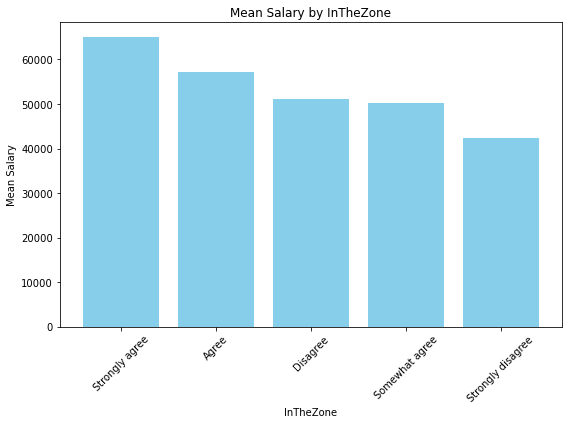

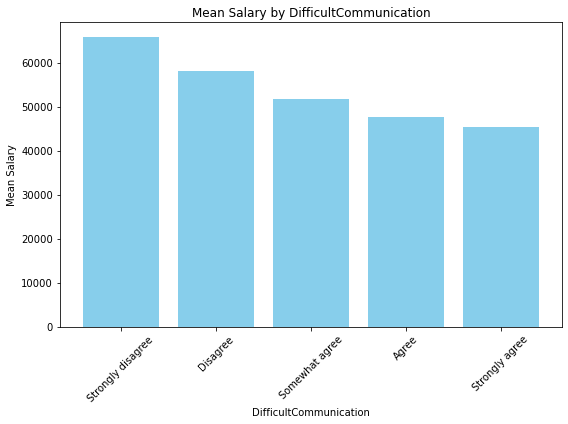

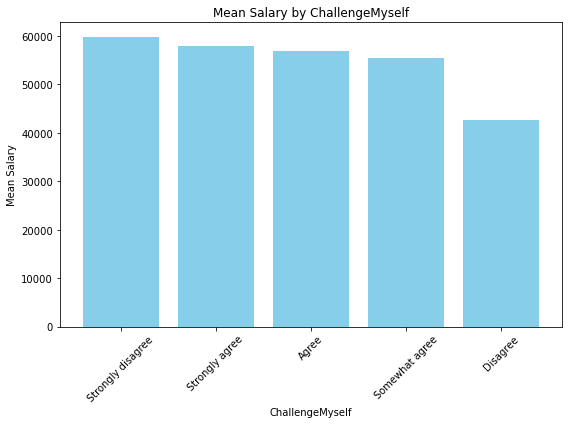

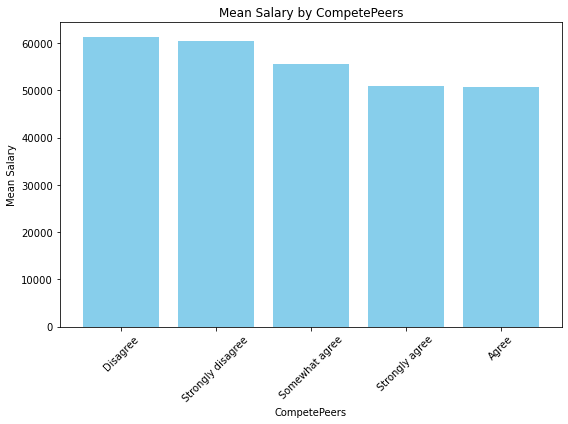

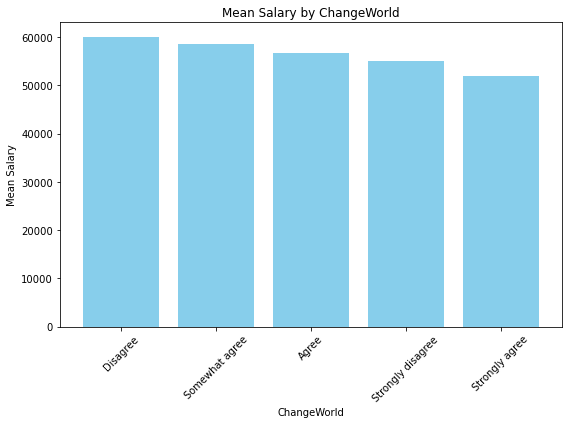

In [232]:
personality_indicators = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'AnnoyingUI',
'SeriousWork', 'InvestTimeTools', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

for i in personality_indicators:
    mean_col2_by_col1(df,i, 'Salary')

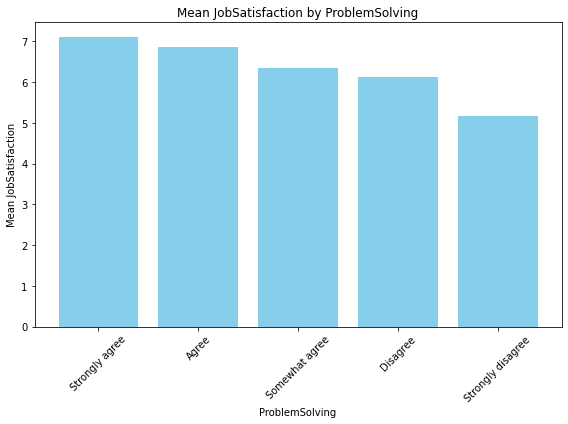

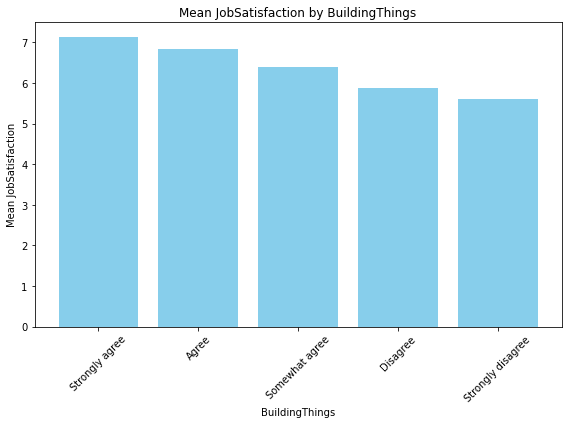

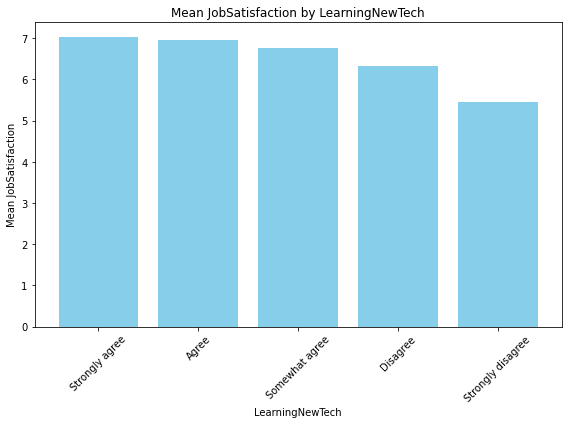

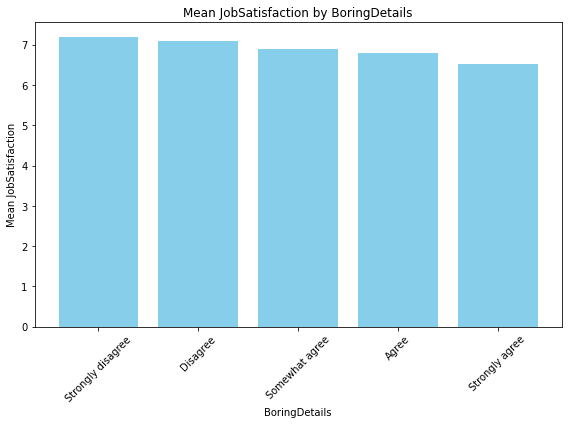

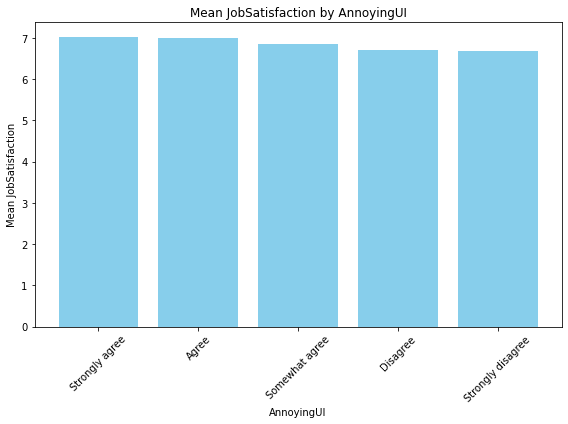

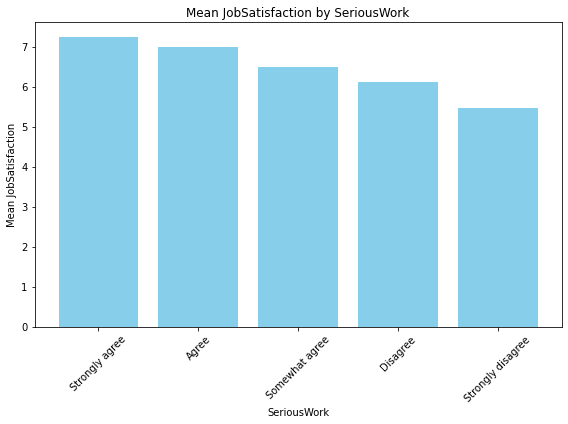

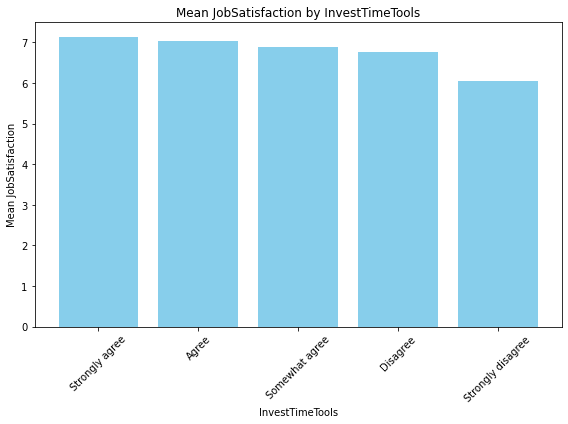

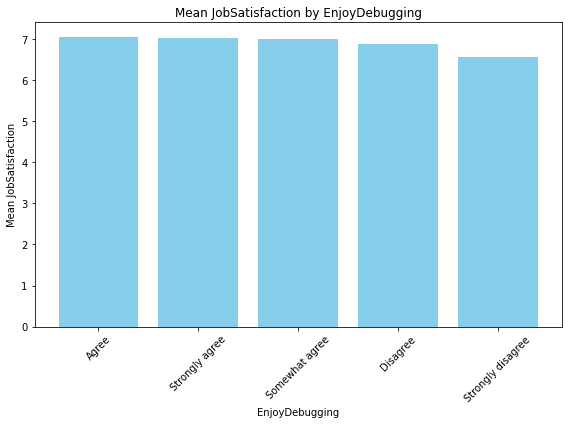

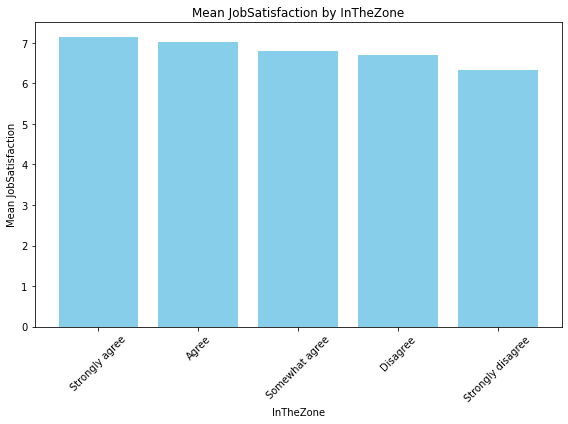

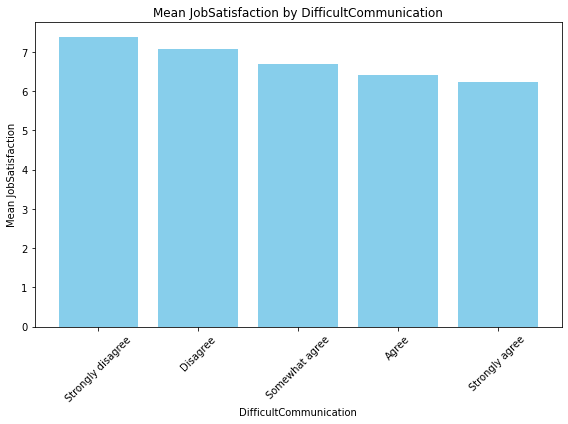

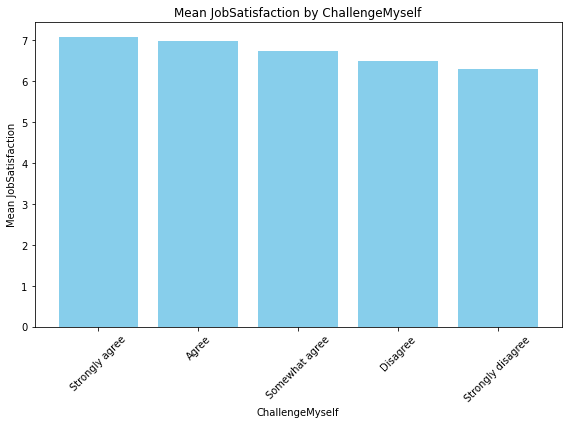

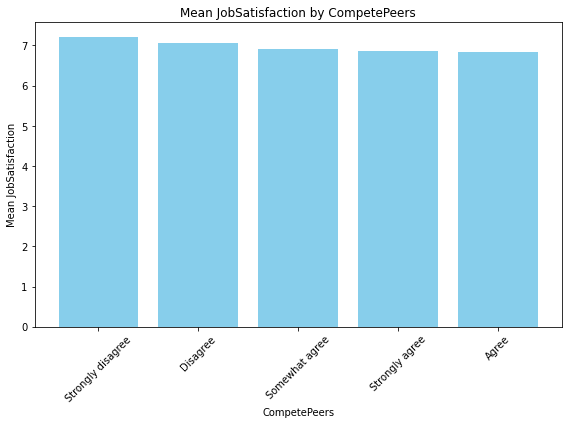

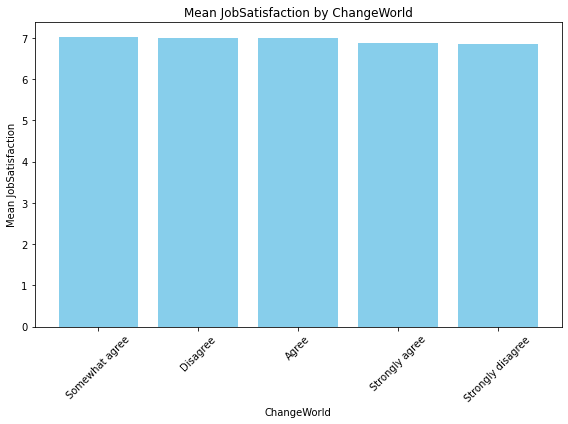

In [231]:
personality_indicators = ['ProblemSolving', 'BuildingThings', 'LearningNewTech', 'BoringDetails', 'AnnoyingUI',
'SeriousWork', 'InvestTimeTools', 
'EnjoyDebugging', 'InTheZone', 'DifficultCommunication',
'ChallengeMyself', 'CompetePeers', 'ChangeWorld']

for i in personality_indicators:
    mean_col2_by_col1(df,i, 'JobSatisfaction')

ProblemSolving and BuildingThings affect JobSatisfaction 

In [ ]:
    mean_col2_by_col1(df,'MajorUndergrad', 'Salary')

Now lets do some modeling, we will predict Salary by the developers' background and personalities 

In [ ]:


def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no salaries
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns from X
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.dropna(subset=['Salary'], axis=0)
    y = df['Salary']
    
    #Drop respondent and expected salary columns
    df = df.drop(['Respondent', 'ExpectedSalary', 'Salary'], axis=1)
    
    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)
        
    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)
    
    X = df
    return X, y
    
#Use the function to create X and y
X, y = clean_data(df)    


# In[ ]:


#cutoffs here pertains to the number of missing values allowed in the used columns.
#Therefore, lower values for the cutoff provides more predictors in the model.
cutoffs = [5000, 3500, 2500, 1000, 100, 50]

r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = t.find_optimal_lm_mod(X, y, cutoffs)


print(X_train.shape[1]) #Number of columns
print(r2_scores_test[np.argmax(r2_scores_test)]) # The model we should implement test_r2
print(r2_scores_train[np.argmax(r2_scores_test)]) # The model we should implement train_r2




def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(20)


